# Prim and dimensional stacking over 100 policies

In [1]:
import pandas as pd
from ema_workbench.analysis import prim
import matplotlib.pyplot as plt
from ema_workbench.analysis import dimensional_stacking

In [2]:
experiments = pd.read_csv('Outcomes/Experiments_from_Exploration_1000scenarios_100Policies_pf5.csv')
outcomes_total_dikerings_load_DF = pd.read_csv('Outcomes/Proccesed_basecase_fully_aggregated_100000scenarios_pf5.csv')

In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
experiments = experiments.iloc[:,1:17]

In [5]:
experiments.head()

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,A.4_Bmax,A.4_Brate,A.4_pfail,A.5_Bmax,A.5_Brate,A.5_pfail
0,126.0,223.622426,1.0,0.871722,218.831042,1.0,0.705490,237.027027,10.0,0.852197,122.745031,10.0,0.276320,133.842486,1.0,0.177182
1,79.0,298.108524,1.0,0.100861,232.253542,1.0,0.104278,33.997448,1.5,0.316080,134.287863,1.0,0.254493,206.265410,1.5,0.926149
2,80.0,275.541284,10.0,0.200497,229.990714,1.5,0.055838,114.045936,1.5,0.031793,305.444359,1.5,0.620158,222.904181,1.5,0.273655
3,15.0,200.546816,1.0,0.000321,281.785818,1.0,0.018157,162.548088,1.0,0.153352,262.402559,10.0,0.977910,226.391822,1.0,0.277829
4,120.0,312.688358,1.5,0.202780,334.804942,1.5,0.047327,178.394116,1.5,0.513973,74.210712,1.5,0.565032,199.306059,1.5,0.960193


## Deaths

In this section analysis are performed on the simulated number of deaths by the dike_function.py model

### Total deaths in dikering 5

In [6]:
data = outcomes_total_dikerings_load_DF['A.5_Total Expected Number of Deaths']

#five times smaller than desirable risk by Dutch government:
#(1/100000) times citizens of Deventer (+/- 100000 in jan 2019) / 5
y = data < 1/5

prim_alg = prim.Prim(experiments,y, threshold=0.8)

box1 = prim_alg.find_box()

#### Treshold of Dutch government

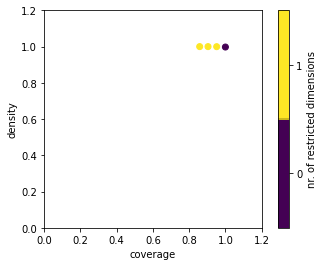

In [7]:
box1.show_tradeoff()
plt.show()

In [8]:
box1.inspect(0)

coverage          1
density     0.99761
id                0
mass              1
mean        0.99761
res_dim           0
Name: 0, dtype: object

Empty DataFrame
Columns: [(box 0, min), (box 0, max), (box 0, qp values)]
Index: []



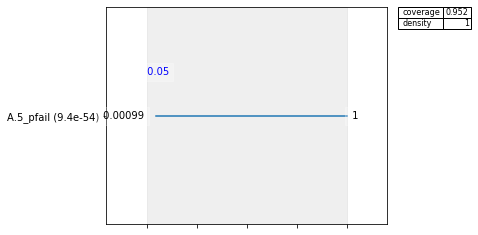

In [9]:
box1.inspect(1,style='graph')
plt.show()

In [10]:
box1.select(1)

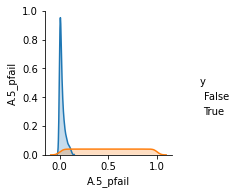

In [11]:
fig = box1.show_pairs_scatter()

Analysis: the outcomes of the model suggest that in dikering 5 causialties will remain far under the treshold of the Dutch goverment in the observed scenarios and policies when the pfail fo the dike is 0.05 or higher. Even without constrains the causilties will meet the treshold. This implies that most of the observered policies will hold under the scenarios.

#### Dimensinal stacking

c:\program files (x86)\python37-32\lib\site-packages\ema_workbench\analysis\dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


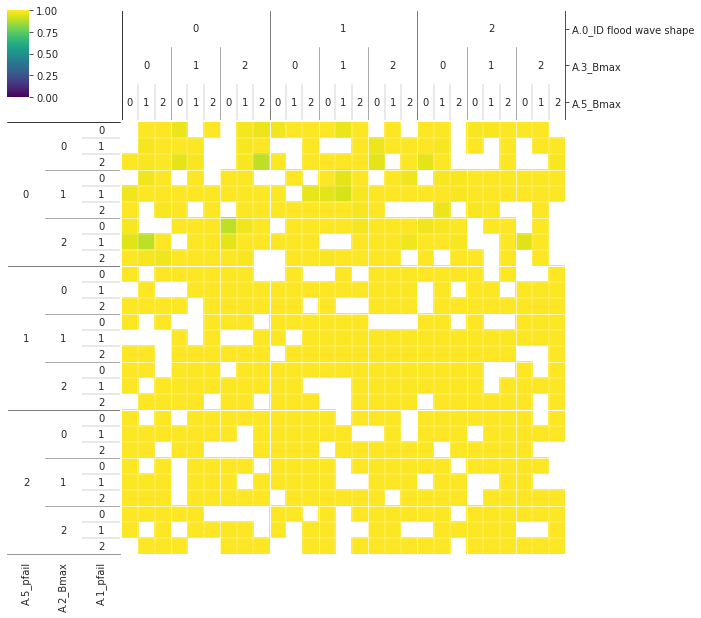

In [20]:
dimensional_stacking.create_pivot_plot(experiments, y)
plt.show()

### Total deaths in all the dikerings

In [12]:
outcomes_total_dikerings_load_DF.head()

,Unnamed: 0,Unnamed: 0.1,A.1_Expected Total Damage,A.1_Total Dike Investment Costs,A.1_Total Expected Number of Deaths,A.2_Expected Total Damage,A.2_Total Dike Investment Costs,A.2_Total Expected Number of Deaths,A.3_Expected Total Damage,A.3_Total Dike Investment Costs,A.3_Total Expected Number of Deaths,A.4_Expected Total Damage,A.4_Total Dike Investment Costs,A.4_Total Expected Number of Deaths,A.5_Expected Total Damage,A.5_Total Dike Investment Costs,A.5_Total Expected Number of Deaths,RfR Total Costs,Total Expected Evacuation Costs,Other Areas Total Number of Deaths,Other Areas Total Dike Investment Costs,Other Areas Total Damage,Total Deaths,Expected Total Damage,Total Investment Costs
0,0,0,0.0,2.369736e+08,0.0,0.0,1.741921e+08,0.0,0.000000e+00,1.242050e+08,0.000000,0.0,2.416243e+07,0.0,1.018132e+06,1.342366e+08,0.000253,1.397700e+09,23.209601,0.000000,5.595331e+08,0.000000e+00,0.000253,1.018132e+06,6.937698e+08
1,1,1,0.0,2.369736e+08,0.0,0.0,1.741921e+08,0.0,3.036115e+06,1.242050e+08,0.001489,0.0,2.416243e+07,0.0,0.000000e+00,1.342366e+08,0.000000,1.397700e+09,48.414519,0.001489,5.595331e+08,3.036115e+06,0.001489,3.036115e+06,6.937698e+08
2,2,2,0.0,2.369736e+08,0.0,0.0,1.741921e+08,0.0,1.740958e+08,1.242050e+08,0.128044,0.0,2.416243e+07,0.0,0.000000e+00,1.342366e+08,0.000000,1.397700e+09,5057.037941,0.128044,5.595331e+08,1.740958e+08,0.128044,1.740958e+08,6.937698e+08
3,3,3,0.0,2.369736e+08,0.0,0.0,1.741921e+08,0.0,2.703954e+07,1.242050e+08,0.013140,0.0,2.416243e+07,0.0,0.000000e+00,1.342366e+08,0.000000,1.397700e+09,435.421645,0.013140,5.595331e+08,2.703954e+07,0.013140,2.703954e+07,6.937698e+08
4,4,4,0.0,2.369736e+08,0.0,0.0,1.741921e+08,0.0,0.000000e+00,1.242050e+08,0.000000,0.0,2.416243e+07,0.0,0.000000e+00,1.342366e+08,0.000000,1.397700e+09,0.000000,0.000000,5.595331e+08,0.000000e+00,0.000000,0.000000e+00,6.937698e+08


#### Treshold of Dutch government

In [13]:
data = outcomes_total_dikerings_load_DF['Total Deaths']

# (1/100000) * 163025: treshold of dutch government times citizens of the 5 towns/cities -> 1.6
y = data < 1.6
# risk five times smaller than desired by Dutch government
y1 = data < (y/5)

prim_alg_2_1 = prim.Prim(experiments,y1, threshold=0.8)
box2_5 = prim_alg_2_1.find_box()

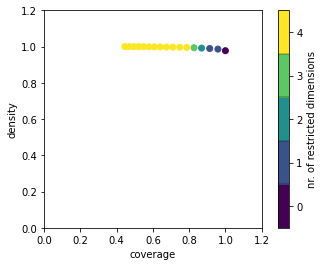

In [15]:
box2_5.show_tradeoff()
plt.show()

In [16]:
box2_5.inspect(1)

coverage    0.958632
density     0.986211
id                 1
mass            0.95
mean        0.986211
res_dim            1
Name: 1, dtype: object

              box 1                                          
                min       max                       qp values
A.3_pfail  0.050041  0.999575  [1.6879078541838063e-87, -1.0]



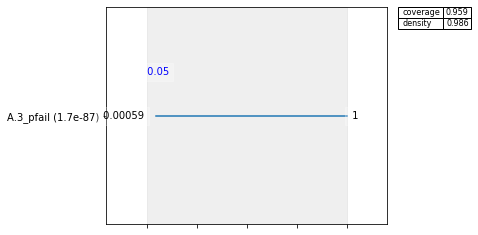

In [17]:
box2_5.inspect(1,style='graph')
plt.show()

In [18]:
box2_5.select(1)

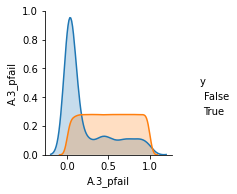

In [19]:
fig = box2_5.show_pairs_scatter()

Analysis: the results of the prim analysis suggest that the treshold of the Dutch government is met when the pfail of the dike in dikering 3 is higher than 0.05. However, the outcome space without constrains has the best scores on coverage and density. This implies that the policies effectively reduce the number of deaths due to floodings. Further analysis for focussing on dikerings 4 and 5 are not necessary.

#### Dimensional stacking

c:\program files (x86)\python37-32\lib\site-packages\ema_workbench\analysis\dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


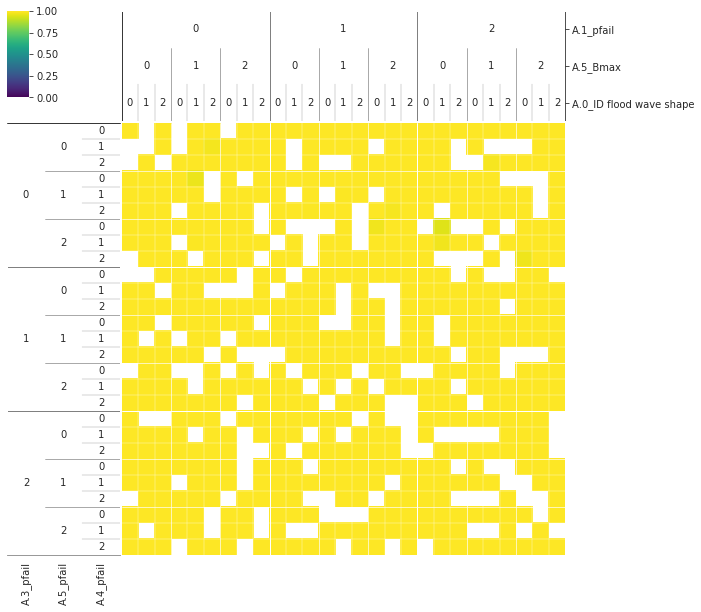

In [34]:
dimensional_stacking.create_pivot_plot(experiments, y)
plt.show()

## Damage

In this section analysis are performed on the simulated number of deaths by the dike_function.py model

### Total damage for all dikerings

In [20]:
data = outcomes_total_dikerings_load_DF['Expected Total Damage']

<AxesSubplot:ylabel='Density'>

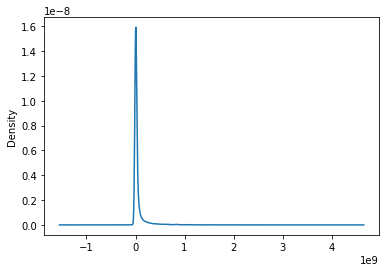

In [21]:
data.plot.kde()

In [22]:
data = outcomes_total_dikerings_load_DF['Expected Total Damage']
print(data.max())
print(data.min())
print(data.quantile(.2))
print(data.quantile(.8))

3102449551.0974674
0.0
0.0
42143894.983246095


As treshold we take 441575627 since this is the highest 20% of the damage cases

In [23]:
data = outcomes_total_dikerings_load_DF['Expected Total Damage']

#is this valid?
y = data > 42143894
y1 = data <= 0
prim_alg_damage_high = prim.Prim(experiments,y, threshold=0.8)
prim_alg_damage_low = prim.Prim(experiments,y1, threshold=0.8)

box_damage_low = prim_alg_damage_low.find_box()
box_damage_high = prim_alg_damage_high.find_box()

In [47]:
data = outcomes_total_dikerings_load_DF['Expected Total Damage']

y = data > 42143894
y1 = data <= 0
# tune threshold to get results
prim_alg_damage_high = prim.Prim(experiments,y, threshold=0.3)
prim_alg_damage_low = prim.Prim(experiments,y1, threshold=0.6)

box_damage_low = prim_alg_damage_low.find_box()
box_damage_high = prim_alg_damage_high.find_box()

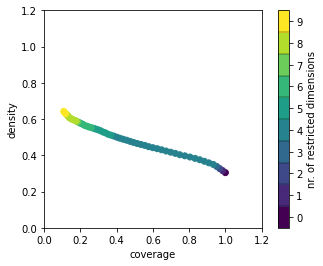

In [38]:
box_damage_low.show_tradeoff()
plt.show()

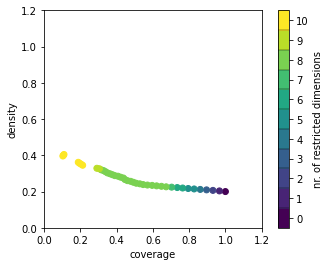

In [48]:
box_damage_high.show_tradeoff()
plt.show()

Analysis: the densities of the observed results are to low to make grounded statements

### Total damage dikering 5

In [74]:
data = outcomes_total_dikerings_load_DF['A.5_Expected Total Damage']

<AxesSubplot:ylabel='Density'>

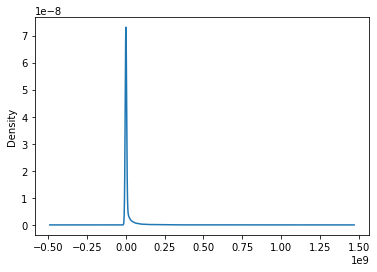

In [75]:
data.plot.kde()

In [77]:
print(data.max())
print(data.min())
print(data.quantile(.2))
print(data.quantile(.8))

980526829.3612797
0.0
0.0
1794800.056251592


In [52]:
data = outcomes_total_dikerings_load_DF['A.5_Expected Total Damage']

y = data <= 0

prim_alg_damage5 = prim.Prim(experiments,y, threshold=0.8)

box_damage5 = prim_alg_damage5.find_box()

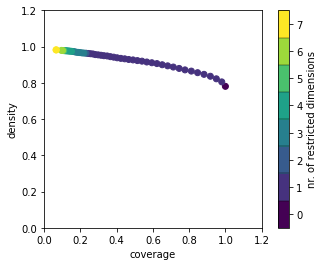

In [53]:
box_damage5.show_tradeoff()
plt.show()

In [64]:
box_damage5.inspect(1)

coverage    0.979889
density     0.805242
id                 1
mass            0.95
mean        0.805242
res_dim            1
Name: 1, dtype: object

              box 1                                         
                min       max                      qp values
A.5_pfail  0.050016  0.999385  [3.997398663920528e-77, -1.0]



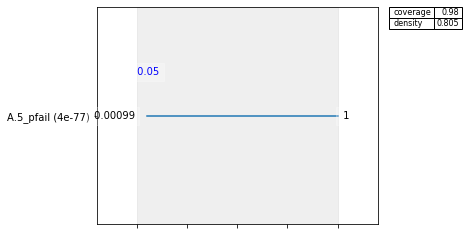

In [65]:
box_damage5.inspect(1,style='graph')
plt.show()

Analysis: it is seen that the outcomes in which dikering 5 does not observes damage are linked to a "pfail" rate of 0.05 or higher. However, most of the outcomes result in no expected damage for Deventer. It appears that implementing policies is effective, and that they hold in most scenario's.

### Total damage dikering 4

In [67]:
data = outcomes_total_dikerings_load_DF['A.4_Expected Total Damage']

<AxesSubplot:ylabel='Density'>

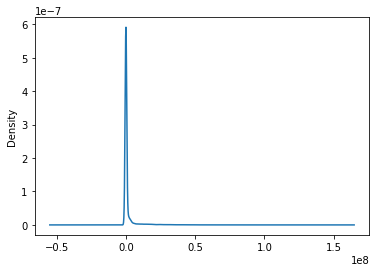

In [68]:
data.plot.kde()

In [69]:
print(data.max())
print(data.min())
print(data.quantile(.2))
print(data.quantile(.8))

109819154.50774358
0.0
0.0
0.0


In [70]:
data = outcomes_total_dikerings_load_DF['A.4_Expected Total Damage']

y = data <= 0

prim_alg_damage5 = prim.Prim(experiments,y, threshold=0.8)

box_damage5 = prim_alg_damage5.find_box()

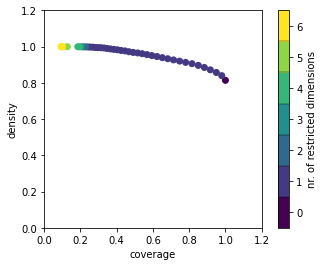

In [71]:
box_damage5.show_tradeoff()
plt.show()

In [72]:
box_damage5.inspect(1)

coverage    0.980108
density     0.839684
id                 1
mass            0.95
mean        0.839684
res_dim            1
Name: 1, dtype: object

              box 1                                         
                min      max                       qp values
A.4_pfail  0.049746  0.99906  [1.6874970125164384e-96, -1.0]



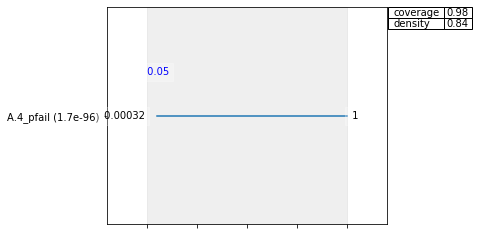

In [73]:
box_damage5.inspect(1,style='graph')
plt.show()

Analysis: it is seen that the outcomes in which dikering 4 does not observes damage are linked to a "pfail" rate of 0.05 or higher. However, most of the outcomes result in no expected damage for Gorssel. It appears that implementing policies is effective, and that they hold in most scenario's.